<a href="https://colab.research.google.com/github/JoaoVitorSantiagoNogueira/cross-image_pixel_operations/blob/main/Apply_cross_pixel_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temporal Median Open CV

## Imports

In [ ]:
import numpy as np
import cv2 as cv
import os
from google.colab.patches import cv2_imshow

## Open Frames

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Median

In [ ]:
def rgb_median_offset(r, g, b):

  lighten= np.ones(len(r)//3,dtype=np.uint8)*256

  return (np.median(np.concatenate(r,lighten),np.concatenate(g,lighten),np.concatenate(b,lighten)))

In [ ]:
def rgb_median(r, g, b):
  return (np.median(r),np.median(g),np.median(b))

In [ ]:
def calc_luminance(p):
  return (0.299*p[0] + 0.587*p[1] + 0.114*p[2])

def rgb_lightest(r, g, b):
  best = 0
  final = (0,0,0)

  for p in zip (r, g, b):
    luminance = calc_luminance(p)


    # if luminance is waay better or slightly worse, change it.
    if best*1.5 < luminance or best*0.9 < luminance < best:
      best = luminance
      final = (p[0],p[1],p[2])

  return final

In [ ]:
## all frames must have the same H/W
def cross_frame_function(frames, func):

  h = frames[0].shape[0]
  w = frames[0].shape[1]

  img = np.zeros((h,w,3), dtype=np.uint8)

  for i in range(0, h):
      for j in range(0, w):
          r_vals = []
          g_vals = []
          b_vals = []

          for f in frames:
              val = f[i,j]
              r_vals.append(val[0])
              g_vals.append(val[1])
              b_vals.append(val[2])

          rgb = func(r_vals,g_vals,b_vals)

          img[i][j] = (rgb)

  return img

# Main

In [ ]:
imgs = load_images_from_folder("/content/sample_data/1_cost_fire")

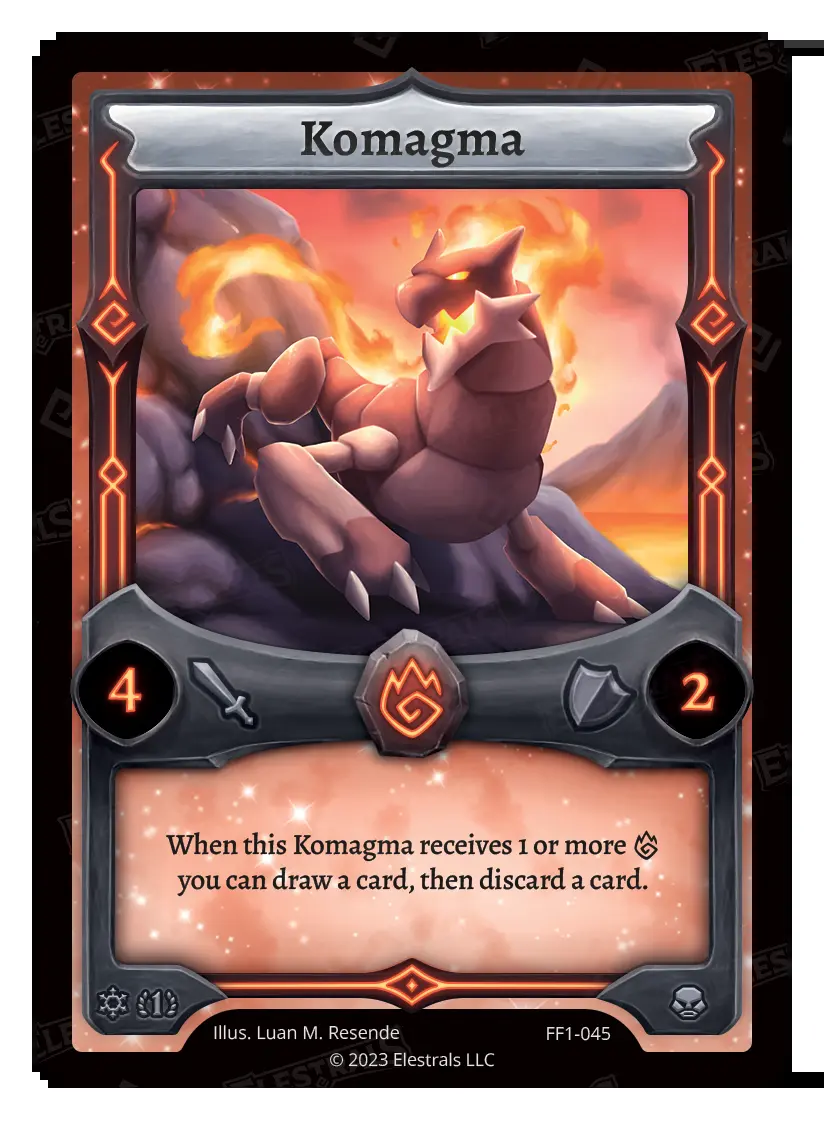

In [ ]:
from random import randint
cv2_imshow(imgs[randint(0,len(imgs))])

In [ ]:
median = cross_frame_function(imgs, rgb_median)

KeyboardInterrupt: 

In [ ]:
lightest = cross_frame_function(imgs, rgb_lightest)

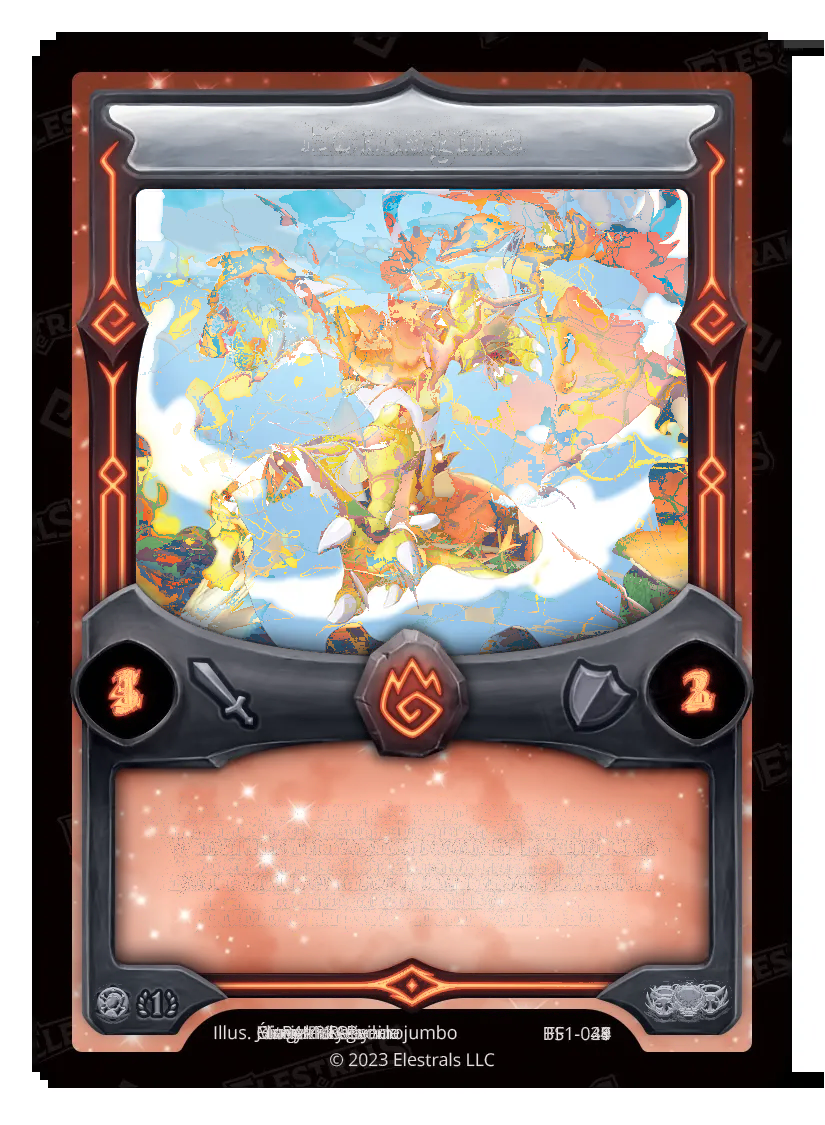

In [ ]:
cv2_imshow(final)